# **XYZ COMPANY AVIATION EXPANSION PROPOSAL**

*XYZ company is expanding into new industries to diversify its portfolio.  
They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know about the potential risks of aircraft.    
They seek to establish which aircraft have the lowest risk for the company to start this new business.  
The aim of the analysis is provide insights to the head of the new aviation division on the on the aircraft that has the least risk for the company to invest*  
*


## **Data Understanding**

To  arrive at our recommedations, we utilized the  Aviation Accident Database & Synopses, up to 2023 downloaded from Kaggle.com in the below link:  
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses.

I used exploratory review to identify meaningful elements in the data that could guide in developing key risk indicators.  
I focused on the below fields in the data:  
	The make and model of the aircrafts.  
	Total_Fatal_Injuries    per accident.  
	Total_Serious_Injuries  per accident.  
    Total_Minor_Injuries    per accident.  
	Total_Uninjured  per accident.  
The data contianed 88889 rows with  31 colums. 
I chose to drop the below colums which had high number of misisng values:
Schedule,Air.carrier,FAR.Description,Latitude,Longitude

I also cleaned the data by dropping rows that had no data for the  make and model of the aircraft which was key in determing the least risky make to procure.




In [176]:
#importing the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [177]:
#Importing data and creating a data frame:
df=pd.read_csv('AviationData.csv',encoding='windows-1252',low_memory=False)



In [178]:
#### **Renaming the columns for ease of referencing**
df.rename(columns={'Event.Id':'Accident_Id','Investigation.Type':'Investigation_Type','Accident.Number':'Accident_Number','Event.Date':'Accident_Date','Purpose.of.flight':'Purpose_of_flight','Total.Fatal.Injuries':'Total_Fatal_Injuries','Total.Serious.Injuries':'Total_Serious_Injuries','Total.Minor.Injuries':'Total_Minor_Injuries','Total.Uninjured':'Total_Uninjured','Broad.phase.of.flight':'Flight_type'},inplace=True)


## **Data cleaning nd anlaysis activities undertaken:**

To clean the data innto analyzable formats, I undertook the following:  
•	Refined the make to replace duplicated makes  
•	Changed the data types for columns with date from text to date formats  
•	changed the data types for columns that had numeric data which was in text format 
•	dropped rows with missing data which could not be replaced by a statistical method


In [179]:
## To determine the data structure and idenfify coluns with misisng dataL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident_Id             88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Accident_Date           88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [180]:
##dropping unnecesary colums in the data set:
df=df.drop('Schedule',axis=1)
df=df.drop('Air.carrier',axis=1)
df=df.drop('FAR.Description',axis=1)
df=df.drop('Latitude',axis=1)
df=df.drop('Longitude',axis=1)
df.shape

(88889, 26)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident_Id             88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Accident_Date           88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50132 non-null  object 
 7   Airport.Name            52704 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Aircraft.Category       32287 non-null  object 
 11  Registration.Number     87507 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88797 non-null  object 
 14  Amateur.Built           88787 non-null

#### **Dropping values that have null values on the make and model of the plane**

In [182]:
df=df.dropna(subset=['Make'])
df=df.dropna(subset=['Model'])
df.shape

(88777, 26)

#### **Filling missing values in the columns to use for analysis**


In [183]:
df['Total_Fatal_Injuries']=df['Total_Fatal_Injuries'].fillna(df['Total_Fatal_Injuries'].median())
df['Total_Serious_Injuries']=df['Total_Serious_Injuries'].fillna(df['Total_Serious_Injuries'].median())
df['Total_Minor_Injuries']=df['Total_Minor_Injuries'].fillna(df['Total_Minor_Injuries'].median ())
df['Total_Uninjured']=df['Total_Uninjured'].fillna(df['Total_Uninjured'].median ())
df['Location']=df['Location'].fillna('Unkown')
df['Country']=df['Country'].fillna('Unkown')
df['Airport.Code']=df['Airport.Code'].fillna('Unkown')
df['Airport.Name']=df['Airport.Name'].fillna('Unkown')
df['Airport.Name']=df['Airport.Name'].fillna('Unkown')
df['Injury.Severity']=df['Injury.Severity'].fillna('Unkown')
df['Aircraft.damage']=df['Aircraft.damage'].fillna('Unkown')
df['Aircraft.Category']=df['Aircraft.Category'].fillna('Unkown')
df['Weather.Condition']=df['Weather.Condition'].fillna('Unkown')



#### **Refining the make of the aircraft to eliminate duplication**

In [184]:
df['Make']=df['Make'].replace('AEROSTAR INTERNATIONAL','AEROSTAR')
df['Make']=df['Make'].replace('AEROSTAR INTERNATIONAL INC','AEROSTAR')
df['Make']=df['Make'].replace('AIR TRACTOR INC','AIR TRACTOR')
df['Make']=df['Make'].replace('AIRBUS INDUSTRIES','AIRBUS')
df['Make']=df['Make'].replace('AIRBUS INDUSTRIES','AIRBUS')
df['Make']=df['Make'].replace('AEROSTAR INTERNATIONAL INC','AEROSTAR')
df.loc[df['Make'].str.contains('AIRBUS', case=False, na=False), 'Make'] = 'AIRBUS'
df['Make']=df['Make'].replace('AMERICAN CHAMPION (ACAC)','AMERICAN')
df['Make']=df['Make'].replace('AMERICAN CHAMPION AIRCRAFT','AMERICAN')
df['Make']=df['Make'].replace('AVIAT AIRCRAFT INC','AVIAT')
df['Make']=df['Make'].replace('BEECHCRAFT','BEECH')
df['Make']=df['Make'].replace('BELL HELICOPTER TEXTRON','BELL')
df['Make']=df['Make'].replace('BELL HELICOPTER TEXTRON CANADA','BELL')
df['Make']=df['Make'].replace('BOEING COMPANY','BOEING')
df['Make']=df['Make'].replace('BOEING STEARMAN','BOEING')
df['Make']=df['Make'].replace('BOEING STEARMAN','BOEING')
df['Make']=df['Make'].replace('BOMBARDIER INC','BOMBARDIER')
df['Make']=df['Make'].replace('BOMBARDIER INC','BOMBARDIER')
df['Make']=df['Make'].replace('BOMBARDIER, INC.','BOMBARDIER')
df['Make']=df['Make'].replace('BRITTEN-NORMAN','BRITTEN NORMAN')
df['Make']=df['Make'].replace('CAMERON BALLOONS','CAMERON')
df['Make']=df['Make'].replace('CIRRUS DESIGN CORP','CIRRUS')
df['Make']=df['Make'].replace('CIRRUS DESIGN CORP.','CIRRUS')
df['Make']=df['Make'].replace('DASSAULT AVIATION','DASSAULT')
df['Make']=df['Make'].replace('DASSAULT-BREGUET','DASSAULT')
df['Make']=df['Make'].replace('DE HAVILLAND','DEHAVILLAND')
df['Make']=df['Make'].replace('DIAMOND AIRCRAFT IND INC','DIAMOND')
df['Make']=df['Make'].replace('MCDONNELL DOUGLAS AIRCRAFT CO','MCDONNELL DOUGLAS')
df['Make']=df['Make'].replace('DIAMOND AIRCRAFT IND INC','DIAMOND')


df['Aircraft.damage']=df['Aircraft.damage'].replace('Unkown','Unknown')
df['Aircraft.damage'].value_counts()

In [185]:
##formatting the name of make to be uppercase:
df['Make']=df['Make'].str.strip().str.upper()
df['Make'].value_counts()


Make
CESSNA             27145
PIPER              14869
BEECH               5376
BELL                2766
BOEING              2746
                   ...  
AERO COMP INC          1
BURAK STANLEY A        1
COHEN                  1
KITCHENS               1
ROYSE RALPH L          1
Name: count, Length: 7563, dtype: int64

### **converting data types and creating new colums for analysis**

In [186]:
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Accident_Id             88777 non-null  object        
 1   Investigation_Type      88777 non-null  object        
 2   Accident_Number         88777 non-null  object        
 3   Accident_Date           88777 non-null  datetime64[ns]
 4   Location                88777 non-null  object        
 5   Country                 88777 non-null  object        
 6   Airport.Code            88777 non-null  object        
 7   Airport.Name            88777 non-null  object        
 8   Injury.Severity         88777 non-null  object        
 9   Aircraft.damage         88777 non-null  object        
 10  Aircraft.Category       88777 non-null  object        
 11  Registration.Number     87438 non-null  object        
 12  Make                    88777 non-null  object     

C:\Users\egichuhi\AppData\Local\Temp\ipykernel_29016\1887703090.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Accident_Date'] = pd.to_datetime(df['Accident_Date'],errors='coerce')


In [187]:
#adding year as a column
df['Year']=df['Accident_Date'].dt.year
df.head(2)

,Accident_Id,Investigation_Type,Accident_Number,Accident_Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather.Condition,Flight_type,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unkown,Unkown,Fatal(2),Destroyed,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unkown,Unkown,Fatal(4),Destroyed,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996,1962


In [188]:
#converting datacolum total fatal injuries to integers
df['Total_Fatal_Injuries'] = df['Total_Fatal_Injuries'].astype(int)

df['Total_Fatal_Injuries'].value_counts()

Total_Fatal_Injuries
0      70997
1       8868
2       5162
3       1585
4       1103
       ...  
156        1
68         1
31         1
115        1
176        1
Name: count, Length: 125, dtype: int64

##DF_accidents_by_make.to_csv('Accidents by make.csv', index=True)

adding columns to the data frame

In [189]:
##df_accidents_by_make= df.groupby('Make')['Accident_Id'].count()
##df_accidents_by_make

In [190]:
#adding year as a column
##df['Year']=df['Accident_Date'].dt.year
##df.head(2)

#### **Creating data sets by agrregation of the clean data set**

In the analysis, I aggregated the data with an aim of:  
Summarizing the accidents by make of the aircraft.  
Summarizing the damages by make of the aircraft.   
computing  the total passangers carried by make of the aircaft.   
Filtering out commercially viable makes based on total passangers carried.  


In [191]:
##summarizing data by make and year
accident_by_year_make=df.groupby(['Year','Make']).size().reset_index(name='accident_count')    
accident_by_year_make

,Year,Make,accident_count
0,1948,STINSON,1
1,1962,PIPER,1
2,1974,CESSNA,1
3,1977,ROCKWELL,1
4,1979,CESSNA,1
...,...,...,...
14831,2022,WINGREN NORMAN,1
14832,2022,WREN RONNIE D,1
14833,2022,YAKOVLEV,2
14834,2022,YATES MIKE E,1


In [192]:
# creating subset of damage by malke
#df_Damage_by_make=df.pivot_table(index='Make', columns='Aircraft.damage', aggfunc='size', fill_value=0)

In [193]:
#Creating colums total injured and total passangers:
df['Total_Injured']=df['Total_Fatal_Injuries']+df['Total_Serious_Injuries']+df['Total_Minor_Injuries']
df['Total_passangers']=df['Total_Fatal_Injuries']+df['Total_Serious_Injuries']+df['Total_Minor_Injuries']+df['Total_Uninjured']

In [194]:
#creating a data set of accidents by make:
df_accidents_by_make= df.groupby('Make').agg({'Total_passangers': 'sum', 'Total_Injured': 'sum','Accident_Id':'count','Total_Fatal_Injuries':'sum'}).reset_index()         

In [195]:
#Renaming colums to accident count:
df_accidents_by_make=df_accidents_by_make.rename(columns={'Accident_Id':'no_of accidents'})
df_accidents_by_make.head()


,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries
0,107.5 FLYING CORPORATION,2.0,1.0,1,1
1,1200,2.0,1.0,1,0
2,177MF LLC,2.0,2.0,1,0
3,1977 COLFER-CHAN,2.0,1.0,1,0
4,1ST FTR GP,1.0,1.0,1,1


In [196]:
#Filetering out data set that meets assumption   of 500 or more passangers per make:
df_commercial_plane_data=df_accidents_by_make[df_accidents_by_make['Total_passangers']>=500]
#commercial_plane_data['Fatality_rate']=(commercial_plane_data['Total_Fatal_Injuries']/commercial_plane_data['Total_passangers'])*100
#commercial_plane_data=df[df['Total_passangers']>=50]##assumed that a commercially viable plane should carry 50 or more passangers
df_commercial_plane_data.head(3)
#df_commercial_plane_data['Total_passangers'].sum()



,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries
66,AERO COMMANDER,951.0,427.0,429,246
93,AERONCA,1048.0,442.0,636,118
108,AEROSPATIALE,3319.0,708.0,388,349


#### **Exporting clean data**

In [197]:
##df.to_csv('Cleaned_accidents_date.csv',index=False)
##df_accidents_by_make.to_csv('Accidents by make.csv',index=False)
##df_Damage_by_make.to_csv('Damagebymake.csv',index=True)
df_commercial_plane_data.to_csv('commercial_plane_data.csv',index=False)
#df_Accident_summary.to_csv('Accident_summary.csv',index=False)
df_commercial_plane_data.head(2)

,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries
66,AERO COMMANDER,951.0,427.0,429,246
93,AERONCA,1048.0,442.0,636,118


In [198]:
#adding the injury rate and fatality rate to the data frame
df_commercial_plane_data=df_accidents_by_make.rename(columns={'Accident_Id':'no_of accidents'})
df_commercial_plane_data['Injury_rate']=(df_commercial_plane_data['Total_Injured']/df_commercial_plane_data['Total_passangers'])*100
df_commercial_plane_data['Fatality_rate']=(df_commercial_plane_data['Total_Fatal_Injuries']/df_commercial_plane_data['Total_passangers'])*100
df_commercial_plane_data.head(2)


,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries,Injury_rate,Fatality_rate
0,107.5 FLYING CORPORATION,2.0,1.0,1,1,50.0,50.0
1,1200,2.0,1.0,1,0,50.0,0.0


#### **Top 10 makes in committing accidents**

In [199]:
df_accidents_by_make=df_accidents_by_make.rename(columns={'Accident_Id':'no_of accidents'})
df_accidents_by_make.head()

,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries
0,107.5 FLYING CORPORATION,2.0,1.0,1,1
1,1200,2.0,1.0,1,0
2,177MF LLC,2.0,2.0,1,0
3,1977 COLFER-CHAN,2.0,1.0,1,0
4,1ST FTR GP,1.0,1.0,1,1


In [200]:
top_10_accident_makes=df_commercial_plane_data.sort_values(by='no_of accidents',ascending=False).head(10)
top_10_accident_makes

,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries,Injury_rate,Fatality_rate
1247,CESSNA,57273.0,21407.0,27145,9638,37.377124,16.828174
5257,PIPER,32190.0,13504.0,14869,6688,41.950916,20.776639
629,BEECH,14557.0,6221.0,5376,3786,42.735454,26.008106
649,BELL,6730.0,3378.0,2766,1355,50.193165,20.133730
817,BOEING,222550.0,13686.0,2746,8748,6.149629,3.930802
4734,MOONEY,2736.0,1324.0,1334,685,48.391813,25.036550
5742,ROBINSON,2436.0,1157.0,1229,618,47.495895,25.369458
2835,GRUMMAN,1960.0,687.0,1172,248,35.051020,12.653061
678,BELLANCA,1767.0,780.0,1045,345,44.142615,19.524618
3334,HUGHES,1956.0,776.0,932,203,39.672802,10.378323


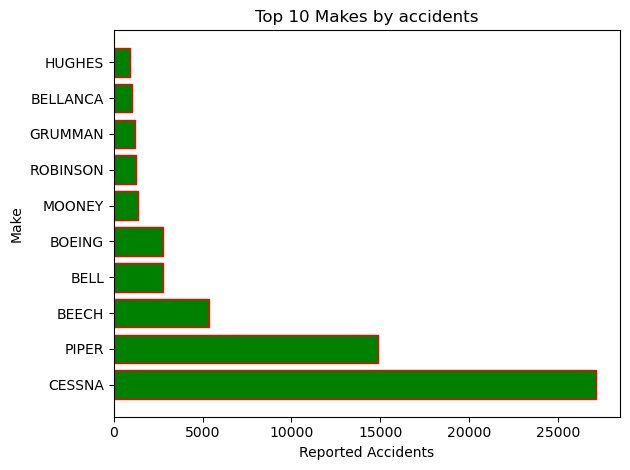

In [201]:
plt .barh(top_10_accident_makes['Make'],top_10_accident_makes['no_of accidents'],color='green',edgecolor='red')
plt.ylabel('Make')
plt.xlabel('Reported Accidents')
plt.title('Top 10 Makes by accidents')
plt.tight_layout()
plt.show()


#### **Top 10 makes in fatality**

In [202]:
top_10_accident_Fatalities=df_commercial_plane_data.sort_values(by='Total_Fatal_Injuries',ascending=False).head(10)
top_10_accident_Fatalities

,Make,Total_passangers,Total_Injured,no_of accidents,Total_Fatal_Injuries,Injury_rate,Fatality_rate
1247,CESSNA,57273.0,21407.0,27145,9638,37.377124,16.828174
817,BOEING,222550.0,13686.0,2746,8748,6.149629,3.930802
5257,PIPER,32190.0,13504.0,14869,6688,41.950916,20.776639
629,BEECH,14557.0,6221.0,5376,3786,42.735454,26.008106
175,AIRBUS,46043.0,3378.0,476,2521,7.336620,5.475317
649,BELL,6730.0,3378.0,2766,1355,50.193165,20.133730
4471,MCDONNELL DOUGLAS,49172.0,3347.0,614,1286,6.806719,2.615310
1945,DOUGLAS,10154.0,1336.0,281,984,13.157376,9.690762
4734,MOONEY,2736.0,1324.0,1334,685,48.391813,25.036550
5742,ROBINSON,2436.0,1157.0,1229,618,47.495895,25.369458


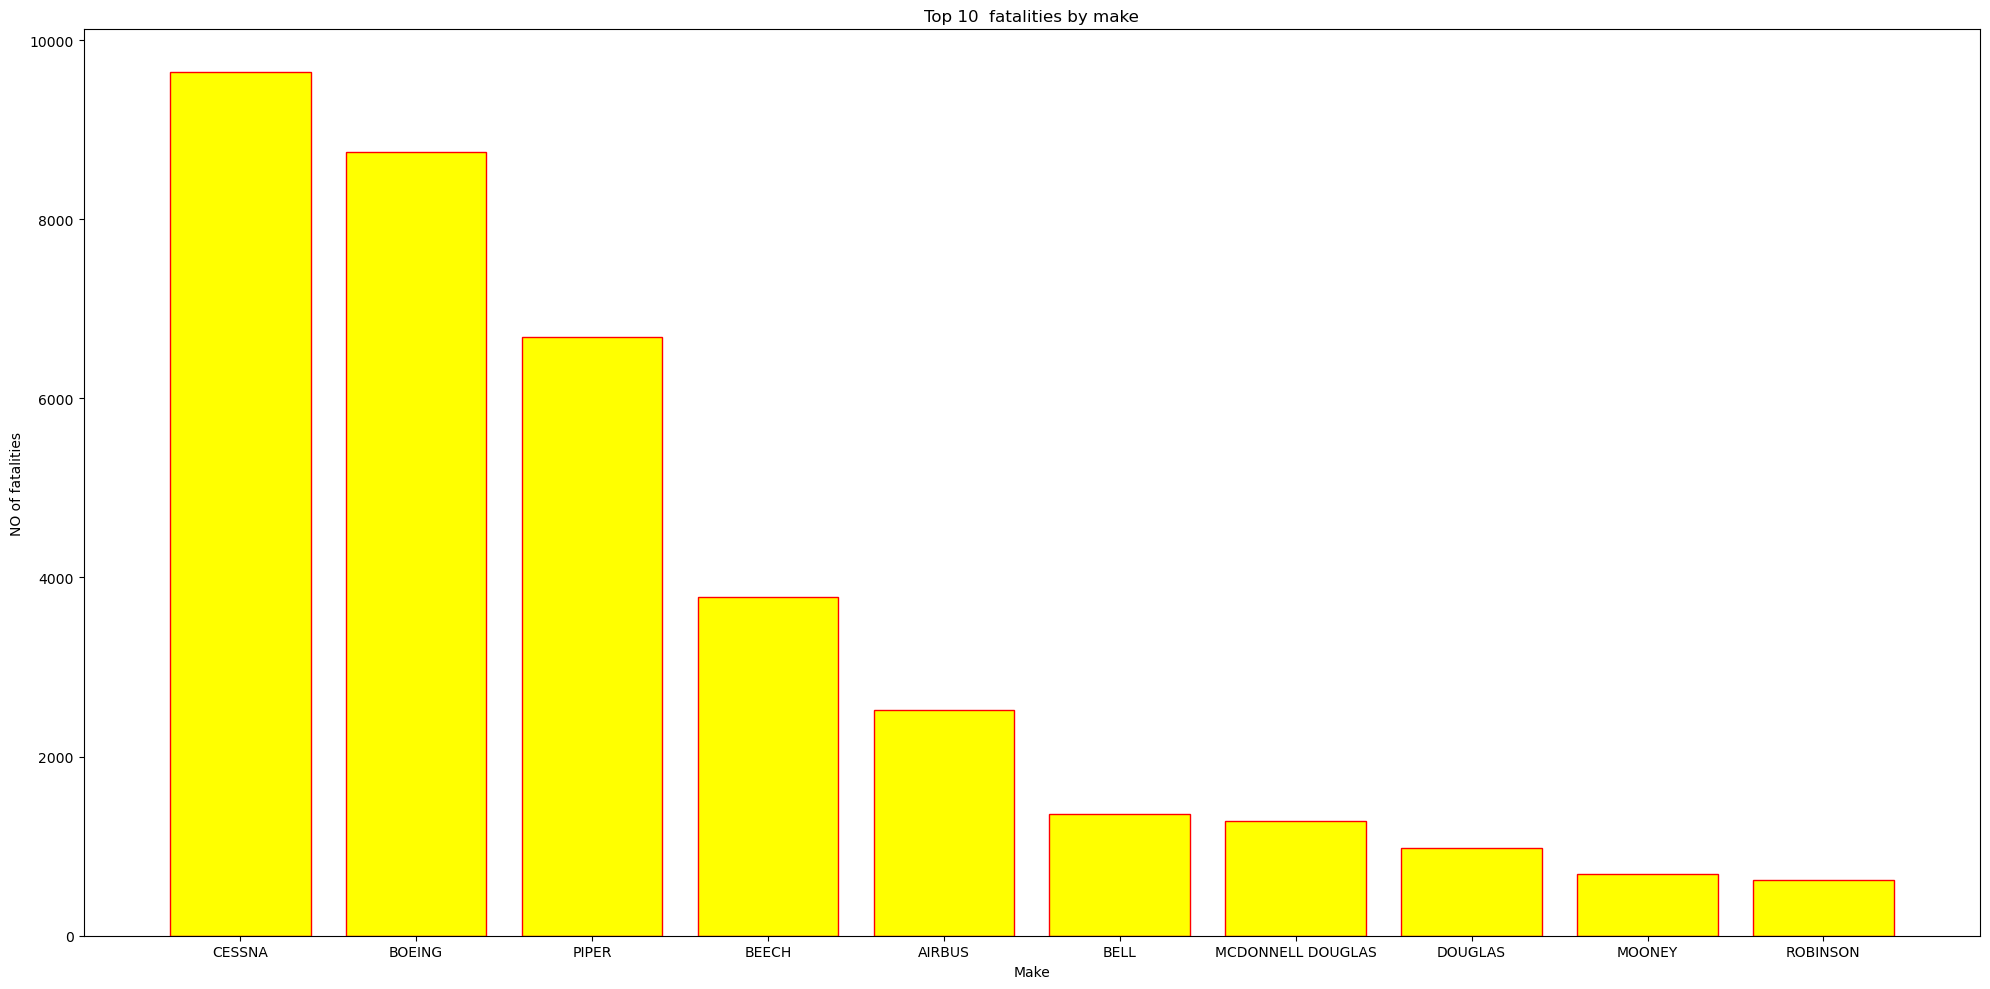

In [203]:
fig,ax=plt.subplots(figsize=(20,10))
ax .bar(top_10_accident_Fatalities['Make'],top_10_accident_Fatalities['Total_Fatal_Injuries'],color='yellow',edgecolor='red')
ax.set_ylabel('NO of fatalities')
ax.set_xlabel('Make')
plt.title('Top 10  fatalities by make')
plt.tight_layout()
plt.show()

#### **Top_10_makes_by_customer_preference**


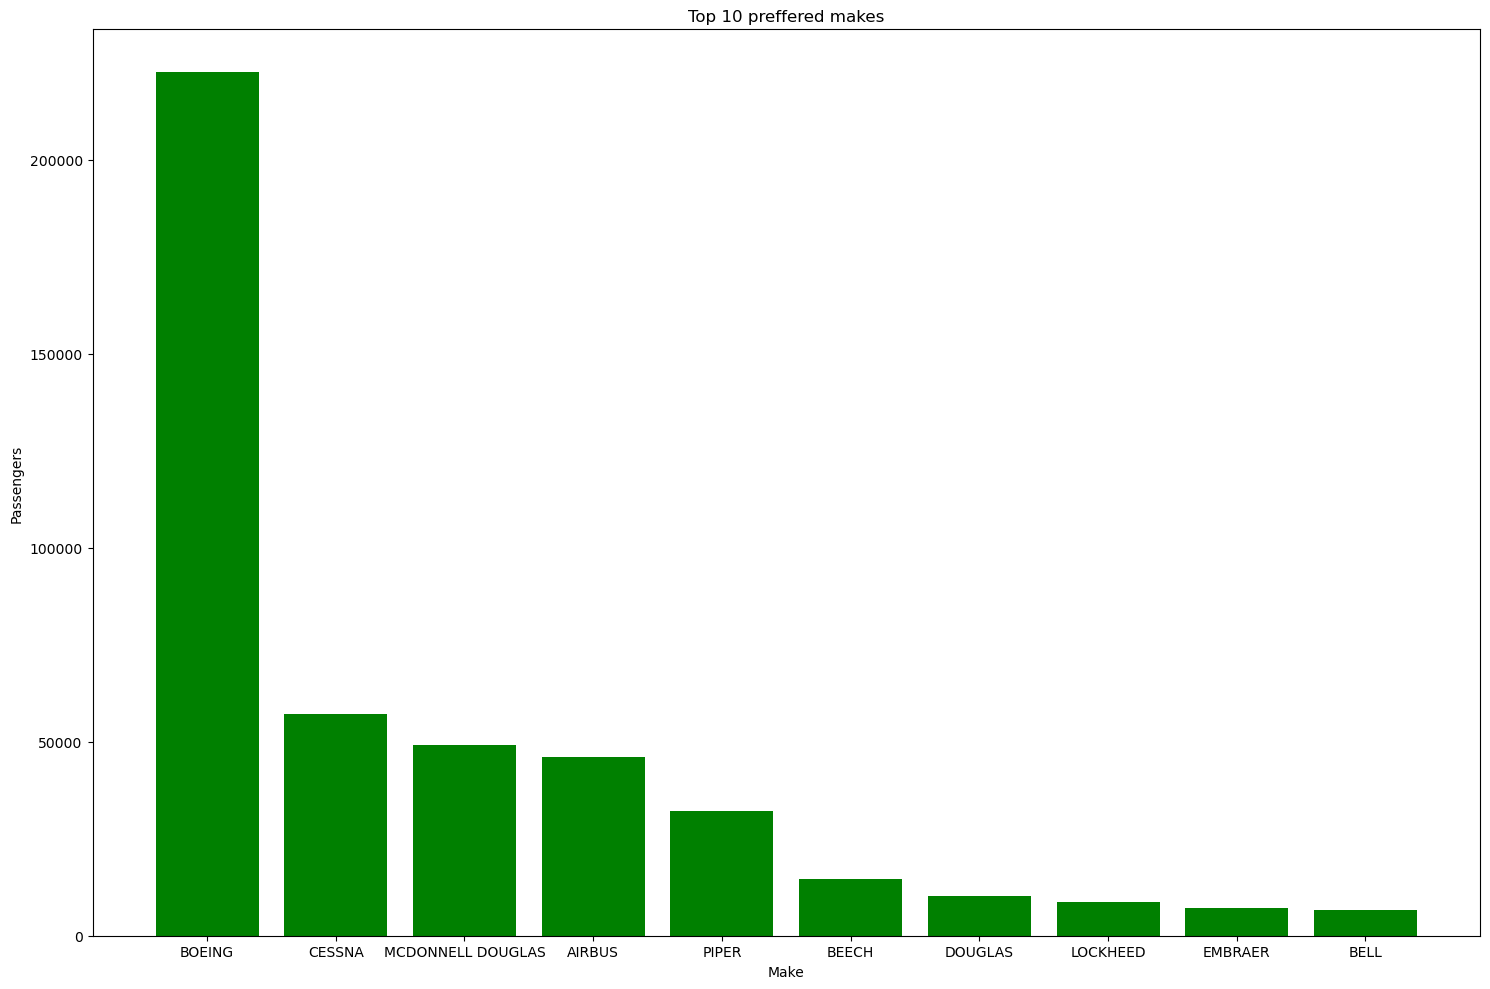

In [205]:
top_10_safe_makes_by_customer_preference = df_commercial_plane_data.sort_values(by='Total_passangers', ascending=False).head(10)
top_10_safe_makes_by_customer_preference

fig,ax=plt.subplots(figsize=(15,10))
ax .bar(top_10_safe_makes_by_customer_preference['Make'],top_10_safe_makes_by_customer_preference['Total_passangers'],color='green')
ax.set_ylabel('Passengers')
ax.set_xlabel('Make')
plt.title('Top 10 preffered makes')
plt.tight_layout()
plt.show()

## **Resluts upon visiualization in Tableau**

### **Risk rating by fatality rate**
Upon cleaning the data and filtering out makes with total passangers of 500 and above, the risk of fatality by plane was computed as by comparing the % of fotal injuries with the total injuries.  
The  data was the plotted in Tableau to identify the makes that had fatality rate of 10% and below.
The classifiaction of aircraft make by fatality rate was as below:  
![data summary](fatality.png)



### **Injury risk by make of aircraft**

The injury risk  to the passangers was derived as a percentage rate of passangers injured by aircraft make to the total passangers per aricraft.  
The clasisfication of aircaft make by injury rate was as summarised below:  
![data summary](injuryrate.png)



### **Customer preference per make**
Customer preference was deemed an important factor in sustaining revneue generation to the company. A such, a summary of the market share per make was provided to management. The summary was as below:

![data summary](marketshare.png)

The dash board can be accessed  through the below link:  
https://public.tableau.com/app/profile/evan.ndungu/viz/test_17388350808510/Dashboard1

## **Conclusion**
Based on the analysis, above the compoany has more than one make whch falls within the injury and fatality rate of below 10%.
In terms of customer preference and market share, Boeng has the largest market share for the company to tap in to.

## **Recommendation**
Based on the analysis, Boeng has the highest market share for the company  to tap into.
with an injury rate of **6.16%** and fatality rate of **3.92%** the make presents a high opportunity to tap into with risks of pasanger injury and fatality within the compnay thresholds.
